In [ ]:
#Importing Libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#New libraries for our project

import yfinance as yf
import datetime

In [ ]:
#Importing Data from Yahoo Finance

#Importing Data from the 5 stocks in the Parent Paper Code

TSLA = yf.Ticker("TSLA")

AAPL = yf.Ticker("AAPL")

GOOG = yf.Ticker("GOOG")

MSFT = yf.Ticker("MSFT")

AMZN = yf.Ticker("AMZN")

SBUX = yf.Ticker("SBUX")

NFLX = yf.Ticker("NFLX")

In [ ]:
#Creating Start and End times for the data

startDate = datetime.datetime(2019, 4, 3)

endDate = datetime.datetime(2024, 4, 4)

In [ ]:
#Modifying the Stock data to be the last 5 years

AAPL = AAPL.history(start = startDate, end = endDate)

TSLA = TSLA.history(start = startDate, end = endDate)

AMZN = AMZN.history(start = startDate, end = endDate)

GOOG = GOOG.history(start = startDate, end = endDate)

MSFT = MSFT.history(start = startDate, end = endDate)

SBUX = SBUX.history(start = startDate, end = endDate)

NFLX = NFLX.history(start = startDate, end = endDate)


AAPL.to_csv("AAPL_Stock_Data")

TSLA.to_csv("TSLA_Stock_Data")

AMZN.to_csv("AMZN_Stock_Data")

GOOG.to_csv("GOOG_Stock_Data")

MSFT.to_csv("MSFT_Stock_Data")

SBUX.to_csv("SBUX_Stock_Data")

NFLX.to_csv("NFLX_Stock_Data")


AAPL_Data = pd.read_csv("AAPL_Stock_Data")

TSLA_Data = pd.read_csv("TSLA_Stock_Data")

AMZN_Data = pd.read_csv("AMZN_Stock_Data")

GOOG_Data = pd.read_csv("GOOG_Stock_Data")

MSFT_Data = pd.read_csv("MSFT_Stock_Data")

SBUX_Data = pd.read_csv("SBUX_Stock_Data")

NFLX_Data = pd.read_csv("NFLX_Stock_Data")

In [ ]:
#Data Preprocessing from the Parent Paper

def Dataset(Data, Date):

  Train_Data = Data['Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)

  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)

  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [ ]:
#Using the Custom Learning Rate from the Parent Paper

def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#Base Model from Parent Paper

def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [ ]:
#New Model


def New_Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(150, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(25, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

APPLE

In [ ]:
#Creating the Train and Test Dataset

#End Date for Train Data: 12/12/2023

#Beginning Date for Test Data: 12/13/2024

AAPL_Date = '2023-12-12'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL_Data, AAPL_Date)

In [ ]:
# AAPL_Model

AAPL_Model = New_Model()

AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 200, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

Epoch 1/400
8/8 [==============================] - 8s 146ms/step - loss: 17521.8594 - root_mean_squared_error: 132.3702 - val_loss: 33500.7891 - val_root_mean_squared_error: 183.0322 - lr: 0.0000e+00
Epoch 2/400
8/8 [==============================] - 0s 45ms/step - loss: 17521.8379 - root_mean_squared_error: 132.3701 - val_loss: 33500.6602 - val_root_mean_squared_error: 183.0319 - lr: 6.6667e-08
Epoch 3/400
8/8 [==============================] - 1s 75ms/step - loss: 17521.7656 - root_mean_squared_error: 132.3698 - val_loss: 33500.4023 - val_root_mean_squared_error: 183.0311 - lr: 1.3333e-07
Epoch 4/400
8/8 [==============================] - 1s 106ms/step - loss: 17521.6426 - root_mean_squared_error: 132.3693 - val_loss: 33500.0000 - val_root_mean_squared_error: 183.0301 - lr: 2.0000e-07
Epoch 5/400
8/8 [==============================] - 1s 111ms/step - loss: 17521.4668 - root_mean_squared_error: 132.3687 - val_loss: 33499.4766 - val_root_mean_squared_error: 183.0286 - lr: 2.6667e-07
Ep

In [ ]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

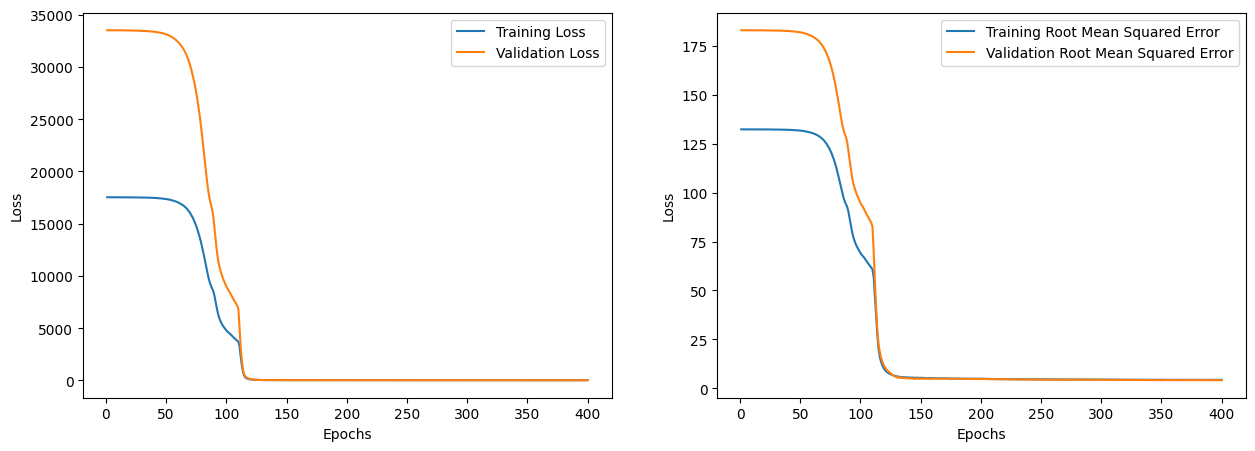

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

1/1 [==============================] - 0s 490ms/step


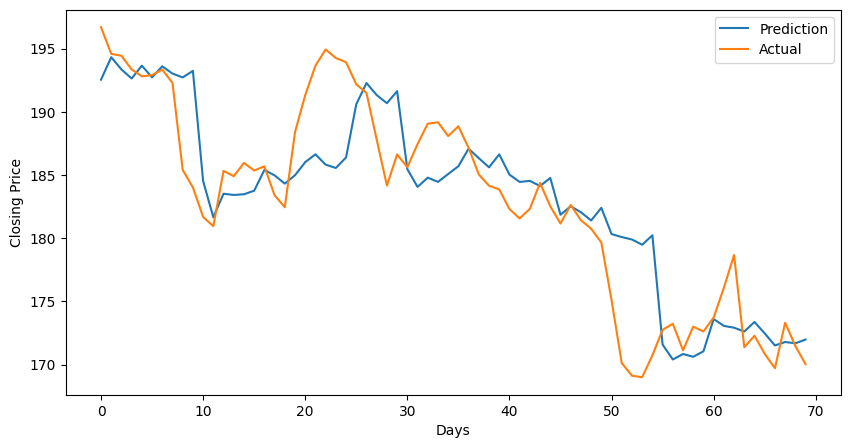

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(AAPL_prediction.reshape(-1), label = 'Prediction')
plt.plot(AAPL_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.156785338962209
MAPE: 0.01646593848582417


TESLA

In [ ]:
#Creating Train and Test Data

TSLA_Date = '2023-12-12'
TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(TSLA_Data, TSLA_Date)

In [ ]:
# TSLA_Model

TSLA_Model = New_Model()

TSLA_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])

Epoch 1/400
8/8 [==============================] - 6s 140ms/step - loss: 42429.2227 - root_mean_squared_error: 205.9835 - val_loss: 40879.6875 - val_root_mean_squared_error: 202.1873 - lr: 0.0000e+00
Epoch 2/400
8/8 [==============================] - 0s 49ms/step - loss: 42428.8125 - root_mean_squared_error: 205.9826 - val_loss: 40878.7695 - val_root_mean_squared_error: 202.1850 - lr: 6.6667e-08
Epoch 3/400
8/8 [==============================] - 0s 47ms/step - loss: 42427.4805 - root_mean_squared_error: 205.9793 - val_loss: 40876.9023 - val_root_mean_squared_error: 202.1804 - lr: 1.3333e-07
Epoch 4/400
8/8 [==============================] - 0s 46ms/step - loss: 42425.1406 - root_mean_squared_error: 205.9736 - val_loss: 40874.1680 - val_root_mean_squared_error: 202.1736 - lr: 2.0000e-07
Epoch 5/400
8/8 [==============================] - 0s 48ms/step - loss: 42421.8242 - root_mean_squared_error: 205.9656 - val_loss: 40870.6016 - val_root_mean_squared_error: 202.1648 - lr: 2.6667e-07
Epoc

In [ ]:
history_dict = TSLA_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

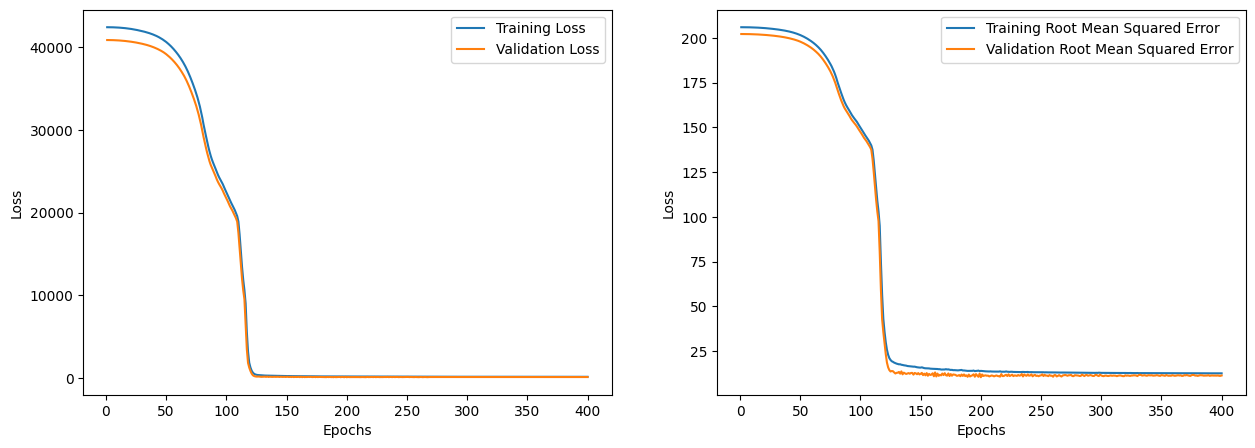

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
TSLA_prediction = TSLA_Model.predict(TSLA_Test_X)

1/1 [==============================] - 1s 529ms/step


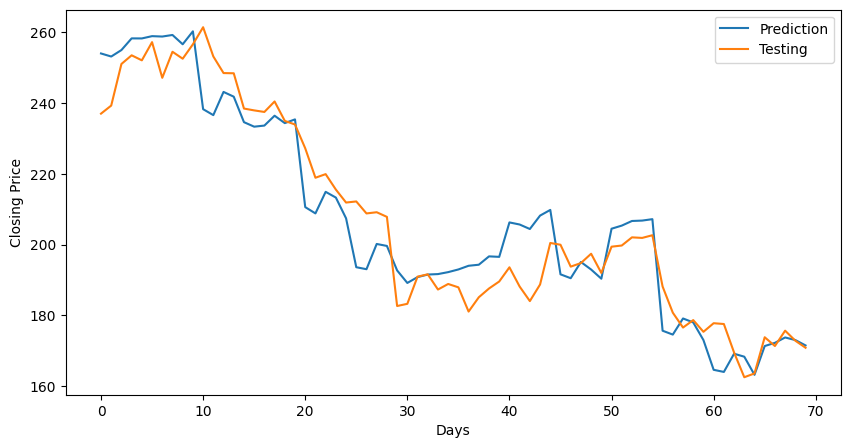

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(TSLA_prediction.reshape(-1), label = 'Prediction')
plt.plot(TSLA_Test_X.reshape(-1), label = 'Testing')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(TSLA_Test_Y.reshape(-1, 5), TSLA_prediction))
mape = np.mean(np.abs(TSLA_prediction - TSLA_Test_Y.reshape(-1, 5))/np.abs(TSLA_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 11.455335342367492
MAPE: 0.045155793755718536


Google

In [ ]:
#Creating Train and Test Data

GOOG_Date = '2023-12-12'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG_Data, GOOG_Date)

In [ ]:
# GOOG_Model

GOOG_Model = New_Model()

GOOG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 200, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks=[callback])

Epoch 1/400
8/8 [==============================] - 8s 132ms/step - loss: 10947.6074 - root_mean_squared_error: 104.6308 - val_loss: 20747.5820 - val_root_mean_squared_error: 144.0402 - lr: 0.0000e+00
Epoch 2/400
8/8 [==============================] - 0s 51ms/step - loss: 10947.5713 - root_mean_squared_error: 104.6306 - val_loss: 20747.3750 - val_root_mean_squared_error: 144.0395 - lr: 6.6667e-08
Epoch 3/400
8/8 [==============================] - 0s 47ms/step - loss: 10947.4512 - root_mean_squared_error: 104.6301 - val_loss: 20746.9590 - val_root_mean_squared_error: 144.0381 - lr: 1.3333e-07
Epoch 4/400
8/8 [==============================] - 0s 50ms/step - loss: 10947.2295 - root_mean_squared_error: 104.6290 - val_loss: 20746.3535 - val_root_mean_squared_error: 144.0359 - lr: 2.0000e-07
Epoch 5/400
8/8 [==============================] - 0s 55ms/step - loss: 10946.9326 - root_mean_squared_error: 104.6276 - val_loss: 20745.5156 - val_root_mean_squared_error: 144.0330 - lr: 2.6667e-07
Epoc

In [ ]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

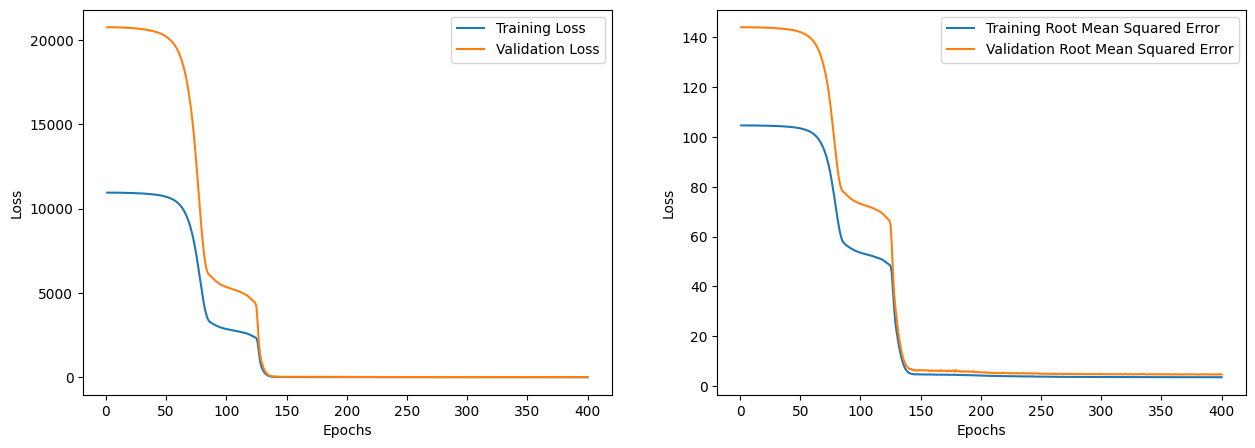

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
GOOG_prediction = GOOG_Model.predict(GOOG_Test_X)

1/1 [==============================] - 0s 474ms/step


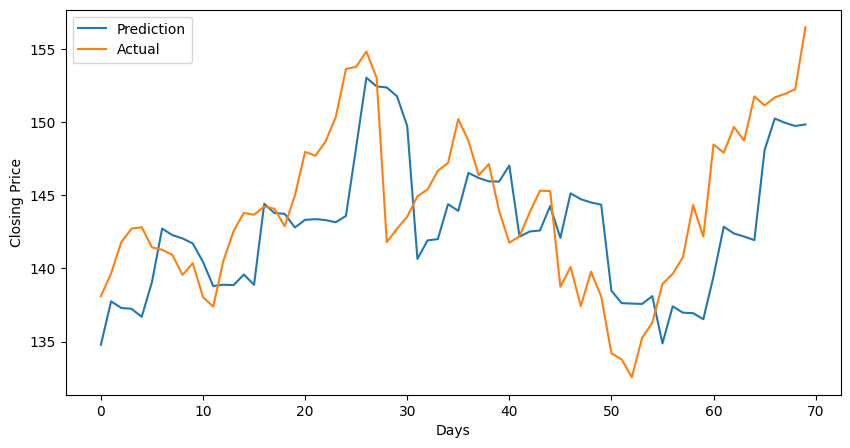

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(GOOG_prediction.reshape(-1), label = 'Prediction')
plt.plot(GOOG_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.68155024767046
MAPE: 0.027224198325181578


AMAZON

In [ ]:
#Creating Train and Test Data

AMZN_Date = '2023-12-12'
AMZN_Train_X, AMZN_Train_Y, AMZN_Test_X, AMZN_Test_Y = Dataset(AMZN_Data, AMZN_Date)

In [ ]:
# AMZN_Model

AMZN_Model = New_Model()

AMZN_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

AMZN_hist = AMZN_Model.fit(AMZN_Train_X, AMZN_Train_Y, epochs = 200, validation_data = (AMZN_Test_X, AMZN_Test_Y), callbacks=[callback])

Epoch 1/400
8/8 [==============================] - 6s 129ms/step - loss: 17757.9219 - root_mean_squared_error: 133.2589 - val_loss: 27475.4102 - val_root_mean_squared_error: 165.7571 - lr: 0.0000e+00
Epoch 2/400
8/8 [==============================] - 0s 56ms/step - loss: 17757.8984 - root_mean_squared_error: 133.2587 - val_loss: 27475.3105 - val_root_mean_squared_error: 165.7568 - lr: 6.6667e-08
Epoch 3/400
8/8 [==============================] - 0s 58ms/step - loss: 17757.8125 - root_mean_squared_error: 133.2584 - val_loss: 27475.1035 - val_root_mean_squared_error: 165.7561 - lr: 1.3333e-07
Epoch 4/400
8/8 [==============================] - 1s 91ms/step - loss: 17757.6641 - root_mean_squared_error: 133.2579 - val_loss: 27474.7930 - val_root_mean_squared_error: 165.7552 - lr: 2.0000e-07
Epoch 5/400
8/8 [==============================] - 1s 79ms/step - loss: 17757.4629 - root_mean_squared_error: 133.2571 - val_loss: 27474.3789 - val_root_mean_squared_error: 165.7540 - lr: 2.6667e-07
Epoc

In [ ]:
history_dict = AMZN_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

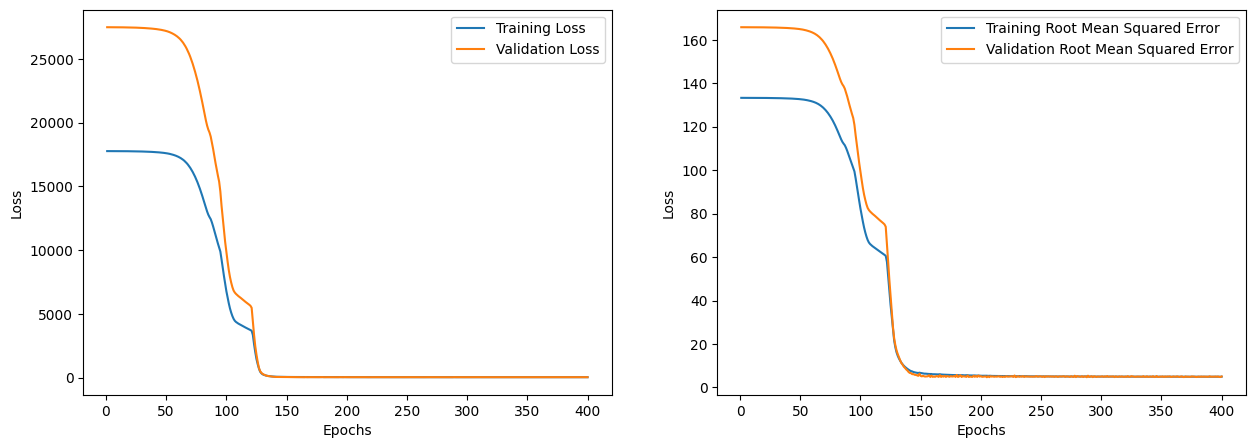

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
AMZN_prediction = AMZN_Model.predict(AMZN_Test_X)

1/1 [==============================] - 1s 530ms/step


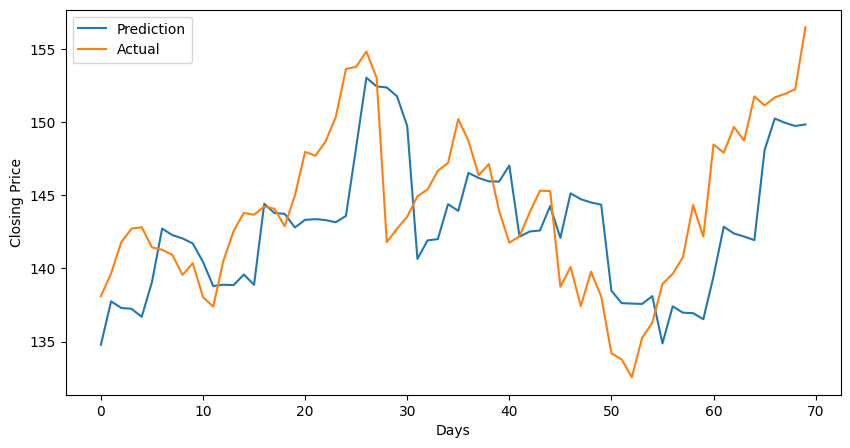

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(GOOG_prediction.reshape(-1), label = 'Prediction')
plt.plot(GOOG_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(AMZN_Test_Y.reshape(-1, 5), AMZN_prediction))
mape = np.mean(np.abs(AMZN_prediction - AMZN_Test_Y.reshape(-1, 5))/np.abs(AMZN_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 5.055342300268886
MAPE: 0.02202931858879944


MICROSOFT

In [ ]:
#Creating Train and Test Data

MSFT_Date = '2023-12-12'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT_Data, MSFT_Date)

In [ ]:
#MSFT_Model

MSFT_Model = New_Model()

MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 200, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

Epoch 1/400
8/8 [==============================] - 6s 190ms/step - loss: 60598.9922 - root_mean_squared_error: 246.1686 - val_loss: 161199.9062 - val_root_mean_squared_error: 401.4971 - lr: 0.0000e+00
Epoch 2/400
8/8 [==============================] - 1s 77ms/step - loss: 60598.8438 - root_mean_squared_error: 246.1683 - val_loss: 161198.7812 - val_root_mean_squared_error: 401.4957 - lr: 6.6667e-08
Epoch 3/400
8/8 [==============================] - 1s 81ms/step - loss: 60598.3047 - root_mean_squared_error: 246.1672 - val_loss: 161196.4531 - val_root_mean_squared_error: 401.4928 - lr: 1.3333e-07
Epoch 4/400
8/8 [==============================] - 0s 46ms/step - loss: 60597.3633 - root_mean_squared_error: 246.1653 - val_loss: 161192.6094 - val_root_mean_squared_error: 401.4880 - lr: 2.0000e-07
Epoch 5/400
8/8 [==============================] - 0s 46ms/step - loss: 60595.9883 - root_mean_squared_error: 246.1625 - val_loss: 161187.3594 - val_root_mean_squared_error: 401.4814 - lr: 2.6667e-07

In [ ]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

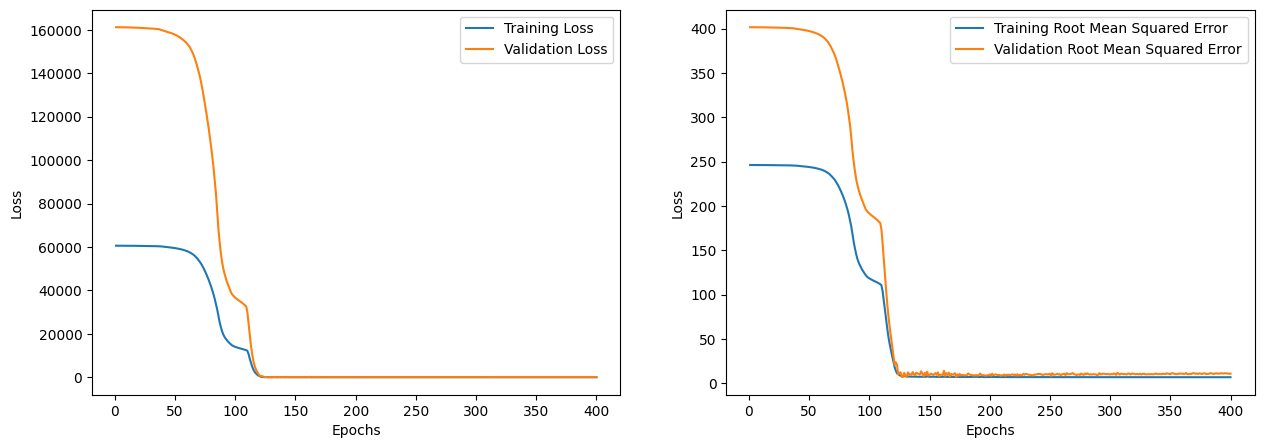

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

1/1 [==============================] - 1s 576ms/step


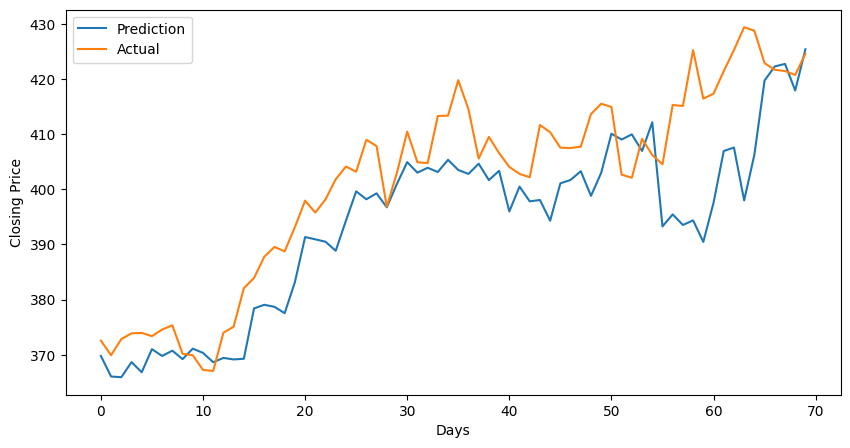

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(MSFT_prediction.reshape(-1), label = 'Prediction')
plt.plot(MSFT_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 10.926262805420533
MAPE: 0.020581642215982274


NETFLIX


In [ ]:
#Creating Train and Test Data

NFLX_Date = '2023-12-12'
NFLX_Train_X, NFLX_Train_Y, NFLX_Test_X, NFLX_Test_Y = Dataset(NFLX_Data, NFLX_Date)

In [ ]:
#NFLX_Model

NFLX_Model = New_Model()

NFLX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

NFLX_hist = NFLX_Model.fit(NFLX_Train_X, NFLX_Train_Y, epochs = 200, validation_data = (NFLX_Test_X, NFLX_Test_Y), callbacks=[callback])

Epoch 1/400
8/8 [==============================] - 6s 143ms/step - loss: 177193.0312 - root_mean_squared_error: 420.9431 - val_loss: 312421.4688 - val_root_mean_squared_error: 558.9468 - lr: 0.0000e+00
Epoch 2/400
8/8 [==============================] - 0s 59ms/step - loss: 177192.2344 - root_mean_squared_error: 420.9420 - val_loss: 312418.5312 - val_root_mean_squared_error: 558.9442 - lr: 6.6667e-08
Epoch 3/400
8/8 [==============================] - 0s 53ms/step - loss: 177189.2969 - root_mean_squared_error: 420.9386 - val_loss: 312412.7812 - val_root_mean_squared_error: 558.9390 - lr: 1.3333e-07
Epoch 4/400
8/8 [==============================] - 0s 54ms/step - loss: 177184.1094 - root_mean_squared_error: 420.9324 - val_loss: 312403.9375 - val_root_mean_squared_error: 558.9311 - lr: 2.0000e-07
Epoch 5/400
8/8 [==============================] - 0s 53ms/step - loss: 177176.5000 - root_mean_squared_error: 420.9234 - val_loss: 312391.5938 - val_root_mean_squared_error: 558.9200 - lr: 2.666

In [ ]:
history_dict = NFLX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

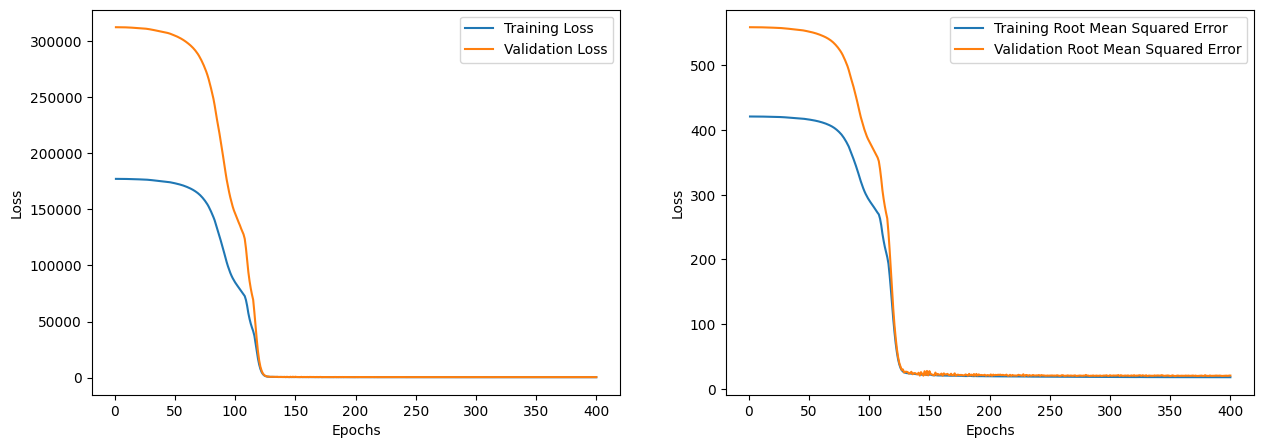

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
NFLX_prediction = NFLX_Model.predict(NFLX_Test_X)

1/1 [==============================] - 1s 888ms/step


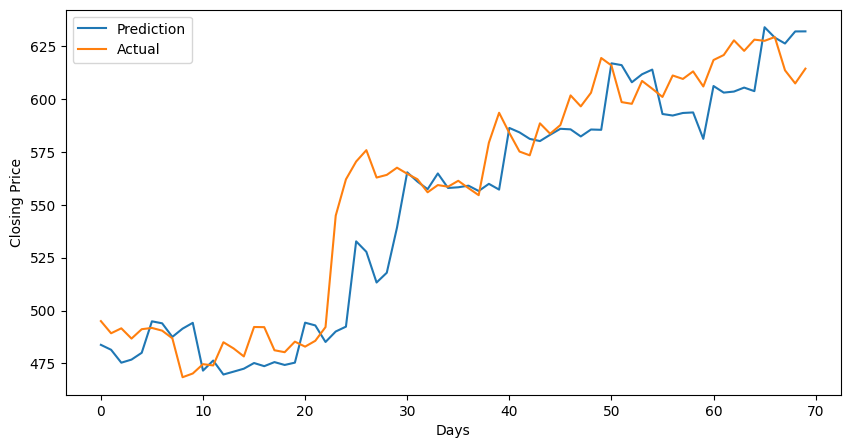

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(NFLX_prediction.reshape(-1), label = 'Prediction')
plt.plot(NFLX_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(NFLX_Test_Y.reshape(-1, 5), NFLX_prediction))
mape = np.mean(np.abs(NFLX_prediction - NFLX_Test_Y.reshape(-1, 5))/np.abs(NFLX_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 20.4616657917772
MAPE: 0.02633850185504483


STARBUCKS

In [ ]:
#Creating Train and Test Data

SBUX_Date = '2023-12-12'
SBUX_Train_X, SBUX_Train_Y, SBUX_Test_X, SBUX_Test_Y = Dataset(SBUX_Data, SBUX_Date)

In [ ]:
#SBUX_Model

SBUX_Model = New_Model()

SBUX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

SBUX_hist = SBUX_Model.fit(SBUX_Train_X, SBUX_Train_Y, epochs = 200, validation_data = (SBUX_Test_X, SBUX_Test_Y), callbacks=[callback])

Epoch 1/400
8/8 [==============================] - 7s 122ms/step - loss: 8177.6240 - root_mean_squared_error: 90.4302 - val_loss: 8658.6045 - val_root_mean_squared_error: 93.0516 - lr: 0.0000e+00
Epoch 2/400
8/8 [==============================] - 0s 53ms/step - loss: 8177.6206 - root_mean_squared_error: 90.4302 - val_loss: 8658.5947 - val_root_mean_squared_error: 93.0516 - lr: 6.6667e-08
Epoch 3/400
8/8 [==============================] - 0s 49ms/step - loss: 8177.6113 - root_mean_squared_error: 90.4301 - val_loss: 8658.5771 - val_root_mean_squared_error: 93.0515 - lr: 1.3333e-07
Epoch 4/400
8/8 [==============================] - 0s 48ms/step - loss: 8177.5942 - root_mean_squared_error: 90.4301 - val_loss: 8658.5498 - val_root_mean_squared_error: 93.0513 - lr: 2.0000e-07
Epoch 5/400
8/8 [==============================] - 0s 43ms/step - loss: 8177.5698 - root_mean_squared_error: 90.4299 - val_loss: 8658.5137 - val_root_mean_squared_error: 93.0511 - lr: 2.6667e-07
Epoch 6/400
8/8 [=======

In [ ]:
history_dict = SBUX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

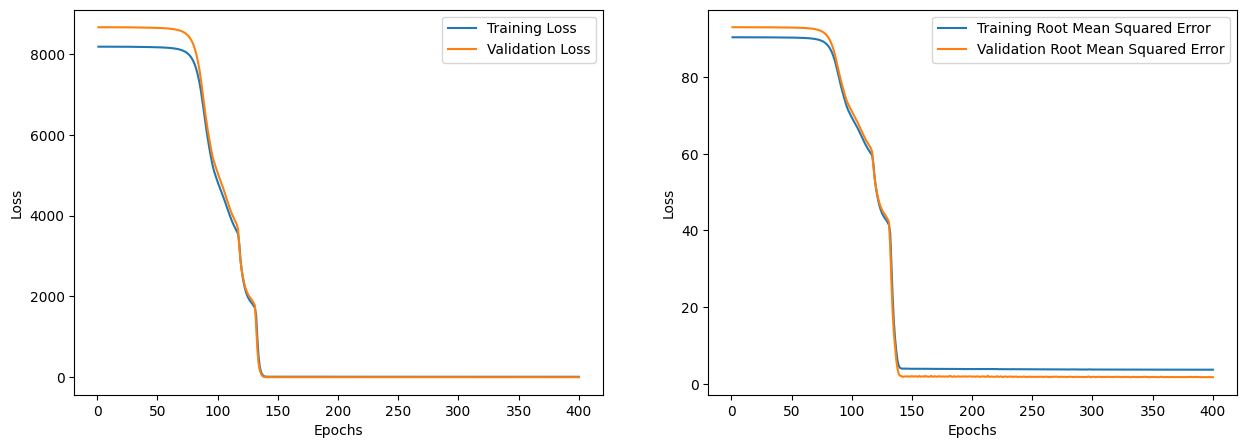

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
SBUX_prediction = SBUX_Model.predict(SBUX_Test_X)

1/1 [==============================] - 0s 457ms/step


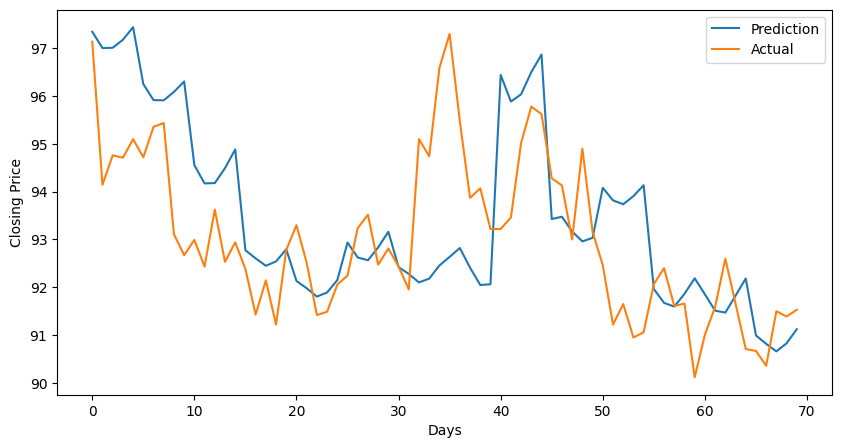

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(SBUX_prediction.reshape(-1), label = 'Prediction')
plt.plot(SBUX_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(SBUX_Test_Y.reshape(-1, 5), SBUX_prediction))
mape = np.mean(np.abs(SBUX_prediction - SBUX_Test_Y.reshape(-1, 5))/np.abs(SBUX_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 1.7168498691486012
MAPE: 0.014042792831420875


In [ ]:
SBUX = pd.read_csv("/content/gdrive/My Drive/sbux.csv")
NFLX = pd.read_csv("/content/gdrive/My Drive/nflx.csv")

In [ ]:
def DatasetNew(Data, Date):

  Train_Data = Data['Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)

  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)

  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

#Starbucks

In [ ]:
SBUX.head()

,Date,Open,High,Low,Close,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,4/5/2024,$87.90,$87.93,$86.83,$86.85,7161442,NaN,NaN,NaN
1,4/4/2024,$89.13,$89.34,$87.61,$87.62,8057591,NaN,NaN,NaN
2,4/3/2024,$89.60,$89.84,$88.65,$88.70,6316375,NaN,NaN,NaN
3,4/2/2024,$91.11,$91.24,$89.23,$89.30,8276754,NaN,NaN,NaN
4,4/1/2024,$91.82,$92.07,$91.02,$91.53,4990156,NaN,NaN,NaN


In [ ]:
SBUX["Open"] = SBUX["Open"].str[1:]
SBUX["Open"] = SBUX["Open"].astype(float)

SBUX["High"] = SBUX["High"].str[1:]
SBUX["High"] = SBUX["High"].astype(float)

SBUX["Low"] = SBUX["Low"].str[1:]
SBUX["Low"] = SBUX["Low"].astype(float)

SBUX["Close"] = SBUX["Close"].str[1:]
SBUX["Close"] = SBUX["Close"].astype(float)

In [ ]:
SBUX = SBUX[["Date", "Open", "High", "Low", "Close", "Volume"]]

In [ ]:
SBUX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
# Change Dtype of Date column
SBUX["Date"] = pd.to_datetime(SBUX["Date"])
SBUX

,Date,Open,High,Low,Close,Volume
0,2024-04-05,87.90,87.93,86.83,86.85,7161442
1,2024-04-04,89.13,89.34,87.61,87.62,8057591
2,2024-04-03,89.60,89.84,88.65,88.70,6316375
3,2024-04-02,91.11,91.24,89.23,89.30,8276754
4,2024-04-01,91.82,92.07,91.02,91.53,4990156
...,...,...,...,...,...,...
1253,2019-04-12,76.10,76.95,76.07,76.65,5193888
1254,2019-04-11,75.75,76.07,75.65,75.87,6042545
1255,2019-04-10,75.21,75.82,75.21,75.48,5889004
1256,2019-04-09,74.87,75.23,74.80,75.12,4904315


###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [ ]:
SBUX_Date = '2023-12-01'
SBUX_Train_X, SBUX_Train_Y, SBUX_Test_X, SBUX_Test_Y = DatasetNew(SBUX, SBUX_Date)

### Model Fitting

In [ ]:
SBUX_Model = Model()

In [ ]:
SBUX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
SBUX_hist = SBUX_Model.fit(SBUX_Train_X, SBUX_Train_Y, epochs = 200, validation_data = (SBUX_Test_X, SBUX_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 4s 124ms/step - loss: 8882.8906 - root_mean_squared_error: 94.2491 - val_loss: 8642.0459 - val_root_mean_squared_error: 92.9626 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 55ms/step - loss: 8882.8242 - root_mean_squared_error: 94.2487 - val_loss: 8641.8809 - val_root_mean_squared_error: 92.9617 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 59ms/step - loss: 8882.5830 - root_mean_squared_error: 94.2475 - val_loss: 8641.5518 - val_root_mean_squared_error: 92.9599 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 54ms/step - loss: 8882.1709 - root_mean_squared_error: 94.2453 - val_loss: 8641.0566 - val_root_mean_squared_error: 92.9573 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 55ms/step - loss: 8881.5791 - root_mean_squared_error: 94.2421 - val_loss: 8640.3965 - val_root_mean_squared_error: 92.9537 - lr: 2.6667e-07
Epoch 6/200
8/8 [=======

In [ ]:
history_dict = SBUX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

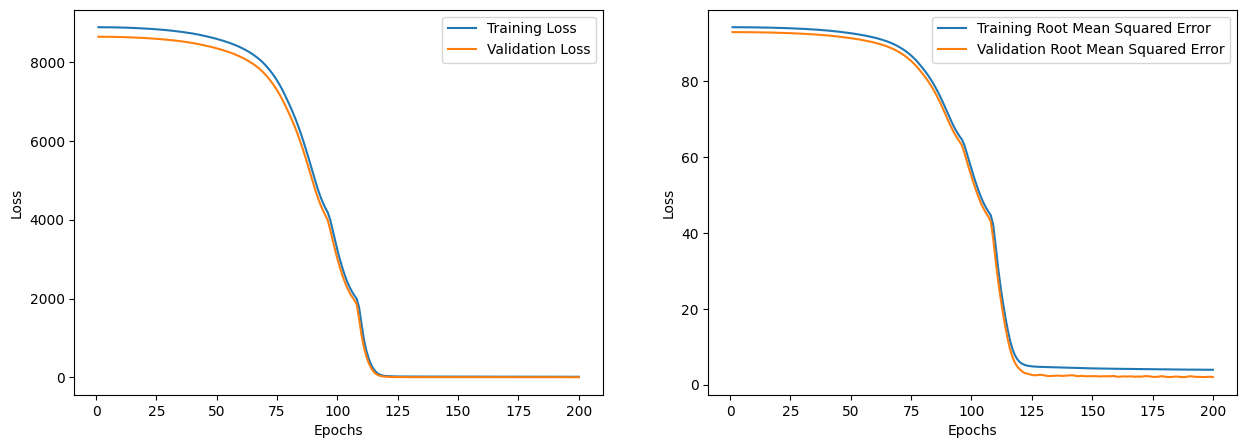

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Starbucks

In [ ]:
SBUX_prediction = SBUX_Model.predict(SBUX_Test_X)

1/1 [==============================] - 0s 25ms/step


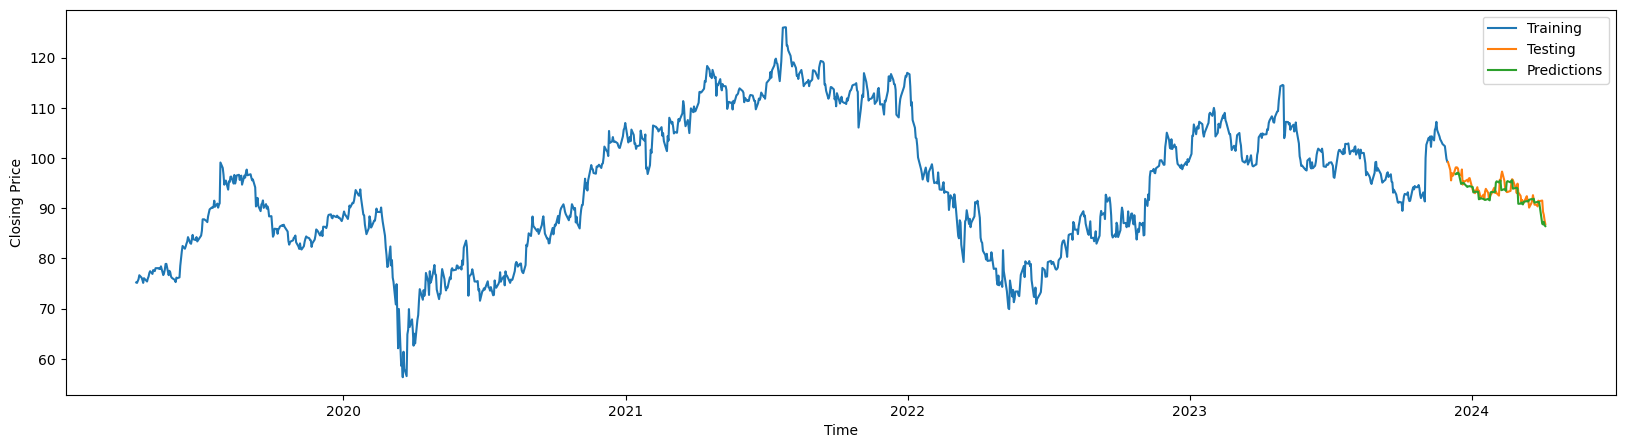

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(SBUX['Date'][SBUX['Date'] < '2023-12-01'], SBUX['Close'][SBUX['Date'] < '2023-12-01'], label = 'Training')
plt.plot(SBUX['Date'][SBUX['Date'] >= '2023-12-01'], SBUX['Close'][SBUX['Date'] >= '2023-12-01'], label = 'Testing')
plt.plot(SBUX['Date'][SBUX['Date'] >= '2023-12-09'], SBUX_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(SBUX_Test_Y.reshape(-1, 5), SBUX_prediction))
mape = np.mean(np.abs(SBUX_prediction - SBUX_Test_Y.reshape(-1, 5))/np.abs(SBUX_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 2.0052444424938196
MAPE: 0.01681388468626473


#Netflix

In [ ]:
NFLX.head()

,Date,Open,High,Low,Close,Volume
0,2024-04-05,7.90,637.91,622.71,636.18,3378842
1,2024-04-04,9.13,638.00,616.58,617.14,3064349
2,2024-04-03,9.60,630.41,611.50,630.08,2931231
3,2024-04-02,1.11,615.03,605.51,614.21,2029217
4,2024-04-01,1.82,615.11,605.57,614.31,2115925


In [ ]:
NFLX["Open"] = NFLX["Open"].str[1:]
NFLX["Open"] = NFLX["Open"].astype(float)

NFLX["High"] = NFLX["High"].str[1:]
NFLX["High"] = NFLX["High"].astype(float)

NFLX["Low"] = NFLX["Low"].str[1:]
NFLX["Low"] = NFLX["Low"].astype(float)

NFLX["Close"] = NFLX["Close"].str[1:]
NFLX["Close"] = NFLX["Close"].astype(float)

In [ ]:
NFLX = NFLX[["Date", "Open", "High", "Low", "Close", "Volume"]]

In [ ]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
# Change Dtype of Date column
NFLX["Date"] = pd.to_datetime(NFLX["Date"])
NFLX

,Date,Open,High,Low,Close,Volume
0,2024-04-05,624.92,637.91,622.71,636.18,3378842
1,2024-04-04,633.21,638.00,616.58,617.14,3064349
2,2024-04-03,612.75,630.41,611.50,630.08,2931231
3,2024-04-02,611.00,615.03,605.51,614.21,2029217
4,2024-04-01,608.00,615.11,605.57,614.31,2115925
...,...,...,...,...,...,...
1253,2019-04-12,360.69,361.75,349.36,351.14,15605580
1254,2019-04-11,365.00,370.12,360.81,367.65,6416155
1255,2019-04-10,365.79,368.85,362.25,363.92,4537963
1256,2019-04-09,360.54,366.74,359.00,364.71,5431467


###Split the Data into Training and Test set
    Training Period: 2019-04-08 - 2023-12-01

    Testing Period:  2023-12-01 - 2024-04-05

In [ ]:
NFLX_Date = '2023-12-01'
NFLX_Train_X, NFLX_Train_Y, NFLX_Test_X, NFLX_Test_Y = DatasetNew(NFLX, NFLX_Date)

### Model Fitting

In [ ]:
NFLX_Model = Model()

In [ ]:
NFLX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
NFLX_hist = NFLX_Model.fit(NFLX_Train_X, NFLX_Train_Y, epochs = 200, validation_data = (NFLX_Test_X, NFLX_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 4s 93ms/step - loss: 175239.6562 - root_mean_squared_error: 418.6164 - val_loss: 295210.8438 - val_root_mean_squared_error: 543.3331 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 33ms/step - loss: 175237.3125 - root_mean_squared_error: 418.6136 - val_loss: 295195.7812 - val_root_mean_squared_error: 543.3192 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 35ms/step - loss: 175229.0156 - root_mean_squared_error: 418.6037 - val_loss: 295166.1250 - val_root_mean_squared_error: 543.2919 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 48ms/step - loss: 175214.5625 - root_mean_squared_error: 418.5864 - val_loss: 295124.9375 - val_root_mean_squared_error: 543.2540 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 55ms/step - loss: 175194.4219 - root_mean_squared_error: 418.5623 - val_loss: 295077.4062 - val_root_mean_squared_error: 543.2103 - lr: 2.6667

In [ ]:
history_dict = NFLX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

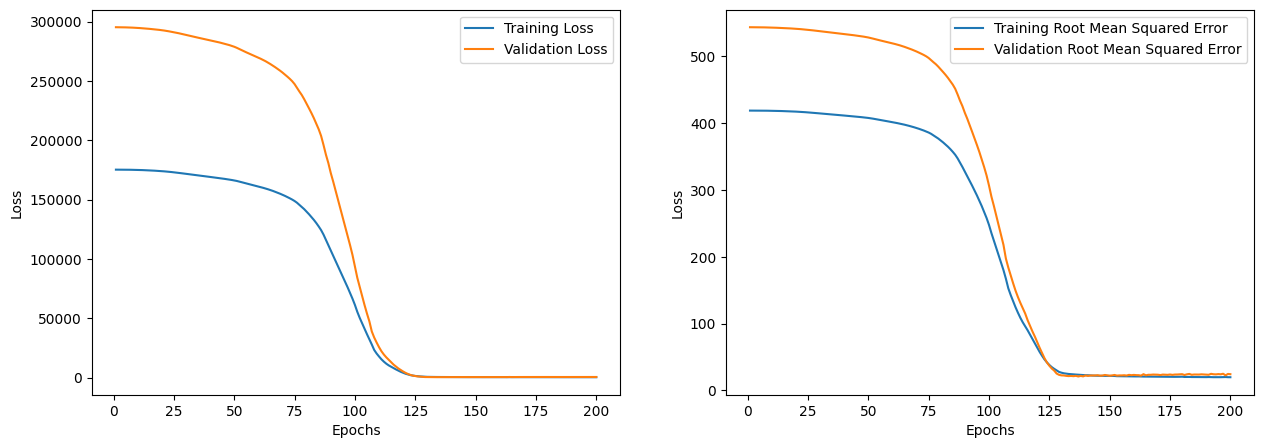

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Netflix

In [ ]:
NFLX_prediction = NFLX_Model.predict(NFLX_Test_X)

1/1 [==============================] - 0s 26ms/step


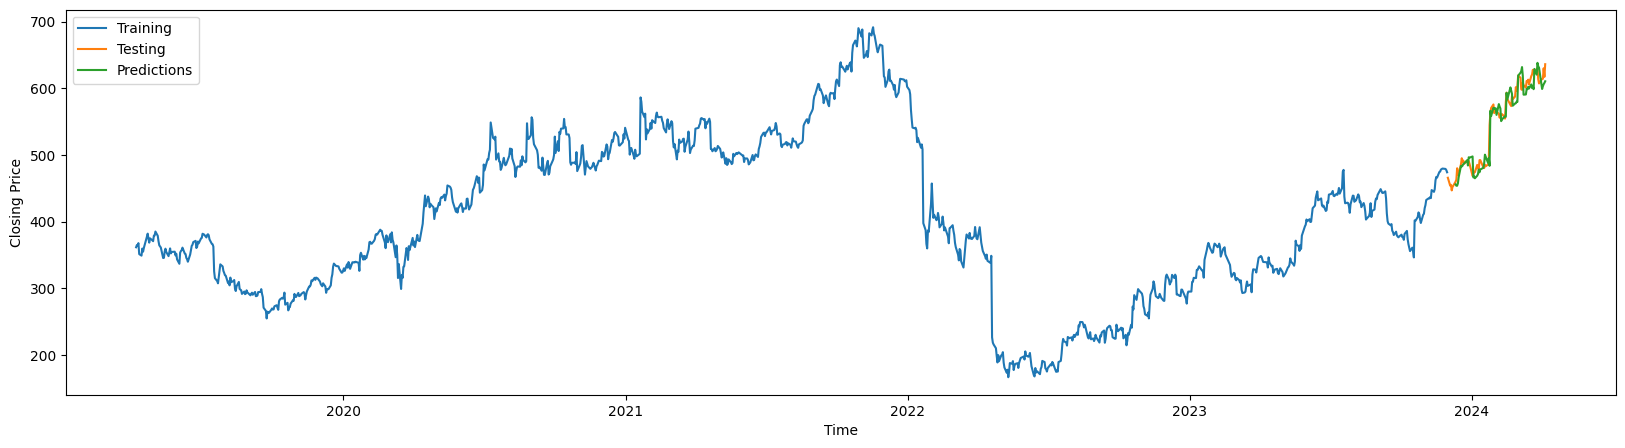

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(NFLX['Date'][NFLX['Date'] < '2023-12-01'], NFLX['Close'][NFLX['Date'] < '2023-12-01'], label = 'Training')
plt.plot(NFLX['Date'][NFLX['Date'] >= '2023-12-01'], NFLX['Close'][NFLX['Date'] >= '2023-12-01'], label = 'Testing')
plt.plot(NFLX['Date'][NFLX['Date'] >= '2023-12-09'], NFLX_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(NFLX_Test_Y.reshape(-1, 5), NFLX_prediction))
mape = np.mean(np.abs(NFLX_prediction - NFLX_Test_Y.reshape(-1, 5))/np.abs(NFLX_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 24.332638303573066
MAPE: 0.030925758052962417
